In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- connecting to drive to unzip the file ,due to large size of file it takes lot of time in our system ,so we use colab to unzip the file


In [ ]:
# unzipping the file
!unzip '/content/drive/MyDrive/ML_dataset/mnist.zip' -d '/content/ML'

Streaming output truncated to the last 5000 lines.
 extracting: /content/ML/New folder/Z/Z-1967.png  
 extracting: /content/ML/New folder/Z/Z-1968.png  
 extracting: /content/ML/New folder/Z/Z-1969.png  
  inflating: /content/ML/New folder/Z/Z-197.png  
 extracting: /content/ML/New folder/Z/Z-1970.png  
 extracting: /content/ML/New folder/Z/Z-1971.png  
 extracting: /content/ML/New folder/Z/Z-1972.png  
  inflating: /content/ML/New folder/Z/Z-1973.png  
 extracting: /content/ML/New folder/Z/Z-1974.png  
 extracting: /content/ML/New folder/Z/Z-1975.png  
 extracting: /content/ML/New folder/Z/Z-1976.png  
  inflating: /content/ML/New folder/Z/Z-1977.png  
 extracting: /content/ML/New folder/Z/Z-1978.png  
 extracting: /content/ML/New folder/Z/Z-1979.png  
 extracting: /content/ML/New folder/Z/Z-198.png  
 extracting: /content/ML/New folder/Z/Z-1980.png  
 extracting: /content/ML/New folder/Z/Z-1981.png  
 extracting: /content/ML/New folder/Z/Z-1982.png  
 extracting: /content/ML/New fold

In [ ]:
from PIL import Image
import numpy as np
import os
imgs = []
labels = []
# setting the file paths
for items in os.listdir('/content/ML/New folder'):
  folder_dir =  '/content/ML/New folder'+'/'+items
  for i in os.listdir(folder_dir):
    # reading the images in PIL format
    img = Image.open(os.path.join(folder_dir,i))
    # appending it to list
    imgs.append(img)
    labels.append(i[0])

In [ ]:
# resizing the images to reduce the size of the columns as well as dataframe
imgs_re = []
for i in imgs:
 imgs_re.append(i.resize((14,14)))


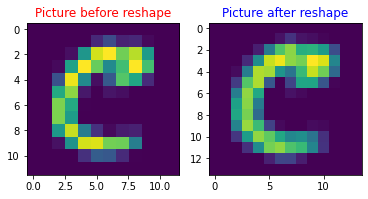

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.title('Picture before reshape',color = 'red')
plt.imshow(imgs[0])
plt.subplot(122)
plt.title('Picture after reshape',color = 'blue')
plt.imshow(imgs_re[0])

In [ ]:
img_list = []
for i in imgs_re:
  # converting PIL to numpy array
  # flattening the array
  img_list.append(list(np.array(i).flatten()))

# creating the dataframe
import pandas as pd
df = pd.DataFrame(img_list)
# adding the labels columns to the list
df['labels'] = labels


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


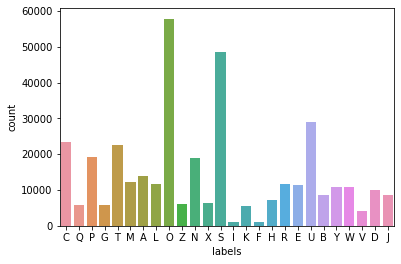

In [ ]:
import seaborn as sns
sns.countplot(df.labels);

This model good at finding the **'o' and 's'** nd week at finding **'i' and 'j'** u can see in above graph

In [ ]:
# saving the dataframe into csv file
df.to_csv('/content/drive/MyDrive/ML_dataset/mnist_csv.csv')

# Data Analysis


dataset link :https://drive.google.com/drive/folders/1DvkqI49gybcz9XEJdtQFyqdc4CUPTj96

In [57]:
# loading the data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML_dataset/mnist_csv.csv')

In [58]:
df.shape

(372451, 198)

In [60]:
df.drop('Unnamed: 0',axis = 1,inplace =True)

In [83]:
df.isna().sum().values.sum()

0

In [86]:
df.duplicated().value_counts()

False    201094
True     171357
dtype: int64

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C


In [87]:
# seperating the input and output data
y = df.labels
X = df.drop('labels',axis = 1)

In [63]:
y.head()

0    C
1    C
2    C
3    C
4    C
Name: labels, dtype: object

In [64]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Conclusion :
  
1.  The data frame has no dupliacates
2.  Even though it has lot of duplicates we are not going to droping it beacause to training purpose ,the model is more accurate
3.   The data set is created by taking the images ,so the visuvalysation is very low






# Data Preprocessing


*   It is a computer vision dataset ,which contains only the *nuemerical values in the same scale*
*   So there is no data preproccesing 



In [66]:
# Segrigating the data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(279338, 196) (93113, 196)
(279338,) (93113,)


# Model_Building

In [67]:
# applying LogisticRegression algorhythm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
# predicting the test data
y_test_pre = classifier.predict(X_test)


In [69]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pre) # accuracy score

0.6074769366253907

In [70]:
# applying DecisionTreeClassifier algorhythm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_test_pre = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_test_pre)


0.9330813098063643

In [71]:
# applying KNeighborsClassifier algorhythm

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_test_pre = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_test_pre)

0.7265902720350542

In [72]:
# applying RandomForestClassifier algorhythm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_test_pre = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_test_pre)

0.9781985329653217

In [73]:
pd.DataFrame({'test':y_test,'pre':y_test_pre}).head(10)

,test,pre
262260,H,H
129902,O,O
72501,T,T
302755,U,U
309175,U,U
138920,O,O
93888,A,A
258196,K,K
350566,V,V
360347,D,D


In [74]:
df1 = pd.DataFrame({'modal':['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier'],
                    'score':[0.6074769366253907,0.9330813098063643,0.7265902720350542,0.9781985329653217]})

In [75]:
df1

,modal,score
0,LogisticRegression,0.607477
1,DecisionTreeClassifier,0.933081
2,KNeighborsClassifier,0.726590
3,RandomForestClassifier,0.978199


<AxesSubplot:xlabel='score', ylabel='modal'>

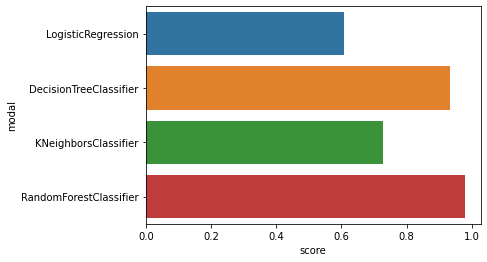

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y = df1.modal,x = df1.score)


**RandomForestClassifier** is the best model for this data set of accuracy score of 97.82

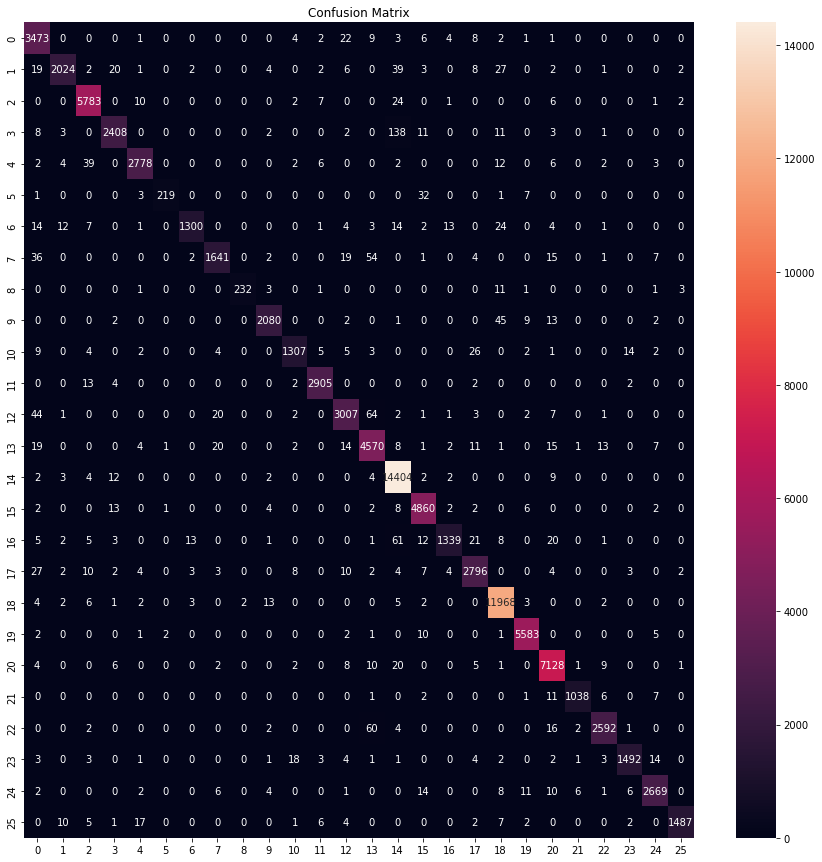

In [91]:
con_metrics = metrics.confusion_matrix(y_test, y_test_pre)
plt.figure(figsize = (15,15))
sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()